In [106]:
%autosave 120
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

galvanizeData = pd.read_csv('downloads/galvanizeData.csv')

Autosaving every 120 seconds


In [90]:
galvanizeData.head()

,Buckets,Quotes,Views
0,Baseline,32,595
1,Variation 1,30,599
2,Variation 2,18,622
3,Variation 3,51,606
4,Variation 4,38,578


In [91]:
print ((32/595) * 100)
print ((30/599) * 100)
print ((18/622) * 100)
print ((51/606) * 100)
print ((38/578) * 100)


5.378151260504202
5.008347245409015
2.8938906752411575
8.415841584158416
6.5743944636678195


In [92]:
galvanizeData['Conversion Rates'] = (galvanizeData['Quotes']/galvanizeData['Views']) * 100
galvanizeData.head()

,Buckets,Quotes,Views,Conversion Rates
0,Baseline,32,595,5.378151
1,Variation 1,30,599,5.008347
2,Variation 2,18,622,2.893891
3,Variation 3,51,606,8.415842
4,Variation 4,38,578,6.574394


In [93]:
galvanizeData.sort(columns='Conversion Rates')

,Buckets,Quotes,Views,Conversion Rates
2,Variation 2,18,622,2.893891
1,Variation 1,30,599,5.008347
0,Baseline,32,595,5.378151
4,Variation 4,38,578,6.574394
3,Variation 3,51,606,8.415842


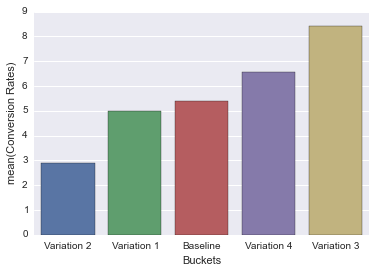

In [100]:
sns.barplot(x = 'Buckets', y = 'Conversion Rates', data=galvanizeData.sort(columns='Conversion Rates'))

I would ask you how did you control for time (time of day, which weekday, etc), and did you account for the fact that maybe the companies were just more desperate due to some lurking/extraneous factor? Since the goal is to have a variation which outputs the highest conversion rate, here are the analysis of my results: version 3 is the best, version 4 is second, baseline is third, version 1 is fourth, and version 2 is the worst.

If I were to run it again, I would consider removing variations that offered a conversion rate below the baseline, so leaving us with baseline, variation 3, and variation 4. Baseline and version 1 have very close results so I would run some more tests with that because as of now it is not easy to tell. 


## Potential problems with collecting data from forms
- The result might have to do with the time of day. 
- The day might matter as well
- Maybe they just needed it as an emergency

## Possible suggestions for improvement
- Controlling for time (time of day, weekday vs weekend)
- Obtain data on similar days (ex: Every Saturday)

## Potential Lurking Factors
- Internet disconnection being disabled while filling out a quote
- Website acting glitchy at moments of quote purchasing

In [107]:
# Program for python text content analyzer

# Requirements
# 1. total word count
# 2. total unique word count
# 3. total sentence count

# Brownie Points
# 1. The ability to find often used phrases (a phrase of 3 or more words used over 3 times)

#f = open('downloads/workfile.txt', 'r')

def text_content_analyzer(f):
    words = []
    nbOfSentences = 0
    punctuation = []
    wordsCount = {}

    for line in f:
        nbOfSentences += len(re.split(r'[.!?]+', line.strip()))-1
        lineWords = line.split()

        words = words + lineWords
        for word in lineWords:
            if word in wordsCount:
                wordsCount[word] += 1
            else:
                wordsCount[word] = 1
   
    print("Total word count: %1.0f" %len(words))
    print(wordsCount)
    print("Unique words: " , len(wordsCount.keys()))
    print(nbOfSentences)
    return len(words), wordsCount, len(wordsCount.keys()), nbOfSentences

#text_content_analyzer(f)